In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [117]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
print(sns.__version__)
assert sns.__version__ >= "0.10"
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

0.11.2


In [118]:
train_set = pd.read_csv('data/train_set.csv',index_col=0) 
test_set = pd.read_csv('data/test_set.csv',index_col=0) 


# The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features



In [119]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features


In [120]:
# print the top elements from the dataset

train_set.head()



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [121]:
test_set.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
0,Brighton,1a Mair St,3,h,S,Buxton,6/08/2016,11.2,3186.0,3.0,2.0,3.0,588.0,NaN,NaN,Bayside,-37.9287,144.9920,Southern Metropolitan,10579.0
1,West Melbourne,5/467 King St,2,u,S,Jellis,28/05/2016,1.9,3003.0,2.0,1.0,1.0,0.0,83.0,2002.0,Melbourne,-37.8091,144.9520,Northern Metropolitan,2230.0
2,St Kilda,7/29 Marine Pde,3,u,SP,McGrath,22/04/2017,6.1,3182.0,3.0,1.0,0.0,0.0,115.0,1930.0,Port Phillip,-37.8718,144.9767,Southern Metropolitan,13240.0
3,Pascoe Vale,8/16 Pascoe St,3,t,VB,Trimson,18/06/2016,9.9,3044.0,3.0,2.0,1.0,146.0,106.0,2006.0,Moreland,-37.7152,144.9346,Northern Metropolitan,7485.0
4,South Kingsville,2/77 Vernon St,2,h,SP,Gunn&Co,24/09/2016,9.1,3015.0,2.0,1.0,2.0,462.0,NaN,1970.0,Hobsons Bay,-37.8331,144.8715,Western Metropolitan,984.0


In [122]:
print(train_set['YearBuilt'].isnull().values.ravel().sum())

print(train_set['YearBuilt'].value_counts().sort_index())





2130
1830.0     1
1854.0     1
1856.0     1
1860.0     1
1862.0     1
          ..
2014.0    46
2015.0    24
2016.0    23
2017.0     9
2018.0     1
Name: YearBuilt, Length: 121, dtype: int64


Suburb 292 304
Address 5399 8073
Rooms 8 9
Type 3 3
Method 5 5
SellerG 203 230
Date 58 57
Distance 194 195
Postcode 187 192
Bedroom2 10 11
Bathroom 9 9
Car 10 10
Landsize 1131 1239
BuildingArea 435 483
YearBuilt 121 131
CouncilArea 32 32
Lattitude 3567 4640
Longtitude 3790 4968
Regionname 8 8
Propertycount 289 301


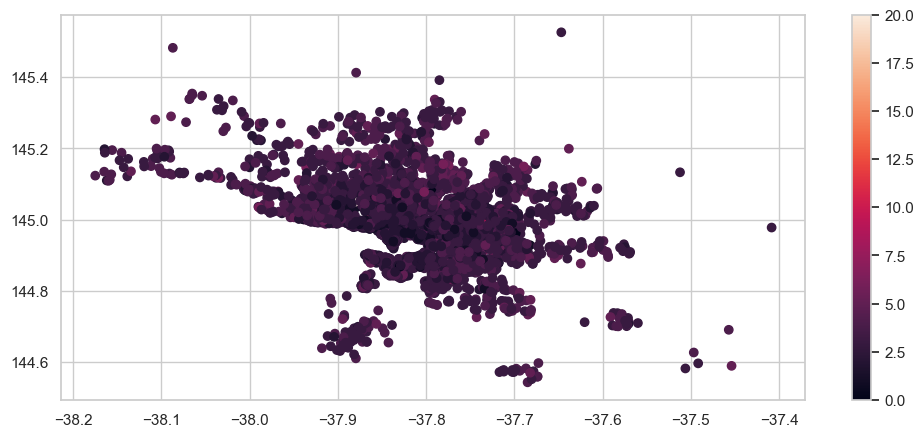

In [123]:
train_set2 = train_set[train_set.Bedroom2 <= 19]

train_set2 = train_set2.drop('Price', axis = 1)

for i in train_set2.columns:
    print(i, train_set2[i].nunique(), test_set[i].nunique())
    
plt.scatter(train_set['Lattitude'], train_set['Longtitude'], c=train_set['Bedroom2'])
plt.colorbar()





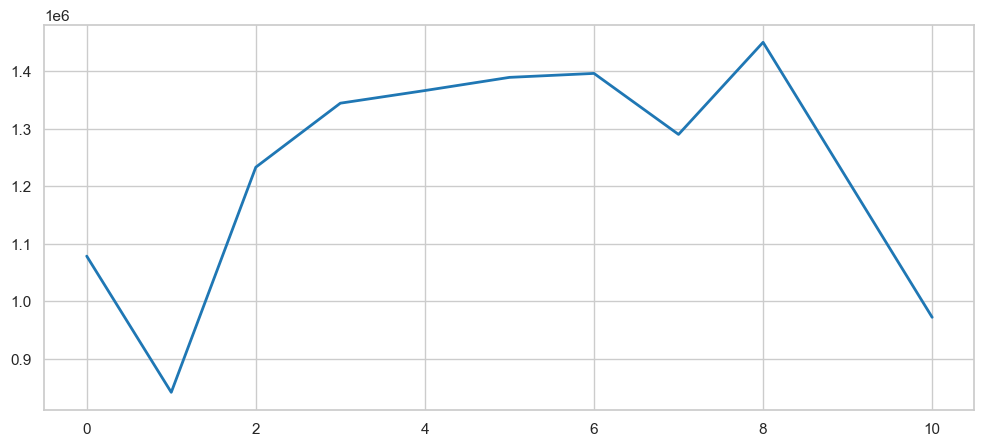

In [124]:
room_avg_price = train_set.groupby('Car').mean().Price.reset_index()

plt.plot(room_avg_price.Car, room_avg_price.Price)

In [125]:
# As it can be seen the database contains several features, some of them numerical and some of them are categorical.
# It is important to check each of the to understand it.
len(set(train_set.Address))

5400

In [126]:
# we can see the type of each features as follows
train_set.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [127]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [128]:
# We can check how many different type there is in the dataset using the folliwing line
train_set["Type"].value_counts()

h    3765
u    1191
t     476
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

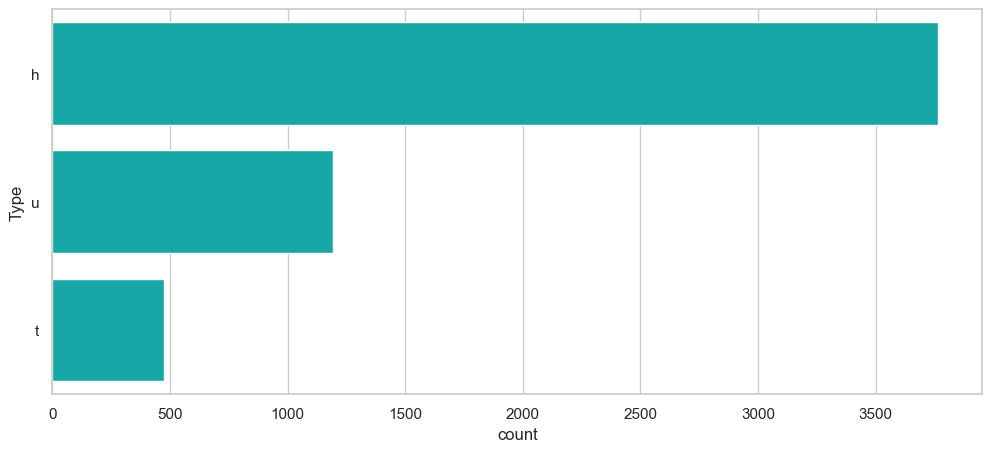

In [129]:
sns.countplot(y="Type", data=train_set, color="c")


It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html

Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased) Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

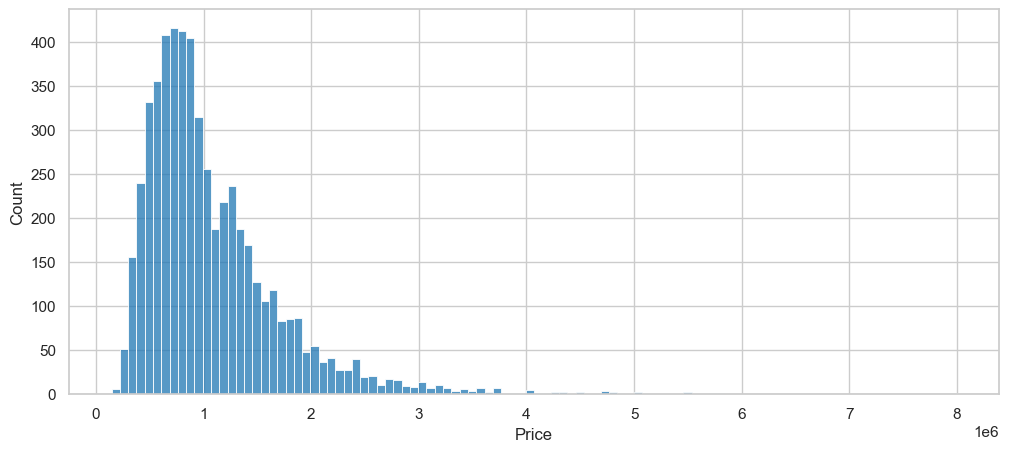

In [130]:
sns.histplot(train_set["Price"])
plt.show()

In [131]:
# Anderson code begin

import datetime
format_str = '%d/%m/%Y' # The format
train_set["Year"]=[datetime.datetime.strptime(d, format_str).date().year for d in train_set.Date]
train_set["Month"]=[datetime.datetime.strptime(d, format_str).date().month for d in train_set.Date]
train_set["YearMonth"]=[str(y)+ "-" + str(m).zfill(2) for y,m in zip(train_set.Year,train_set.Month)]
train_set["YearMonth"]

index
0       2017-08
1       2017-05
2       2016-10
3       2016-05
4       2016-08
         ...   
5427    2016-08
5428    2017-08
5429    2016-08
5430    2016-04
5431    2016-07
Name: YearMonth, Length: 5432, dtype: object

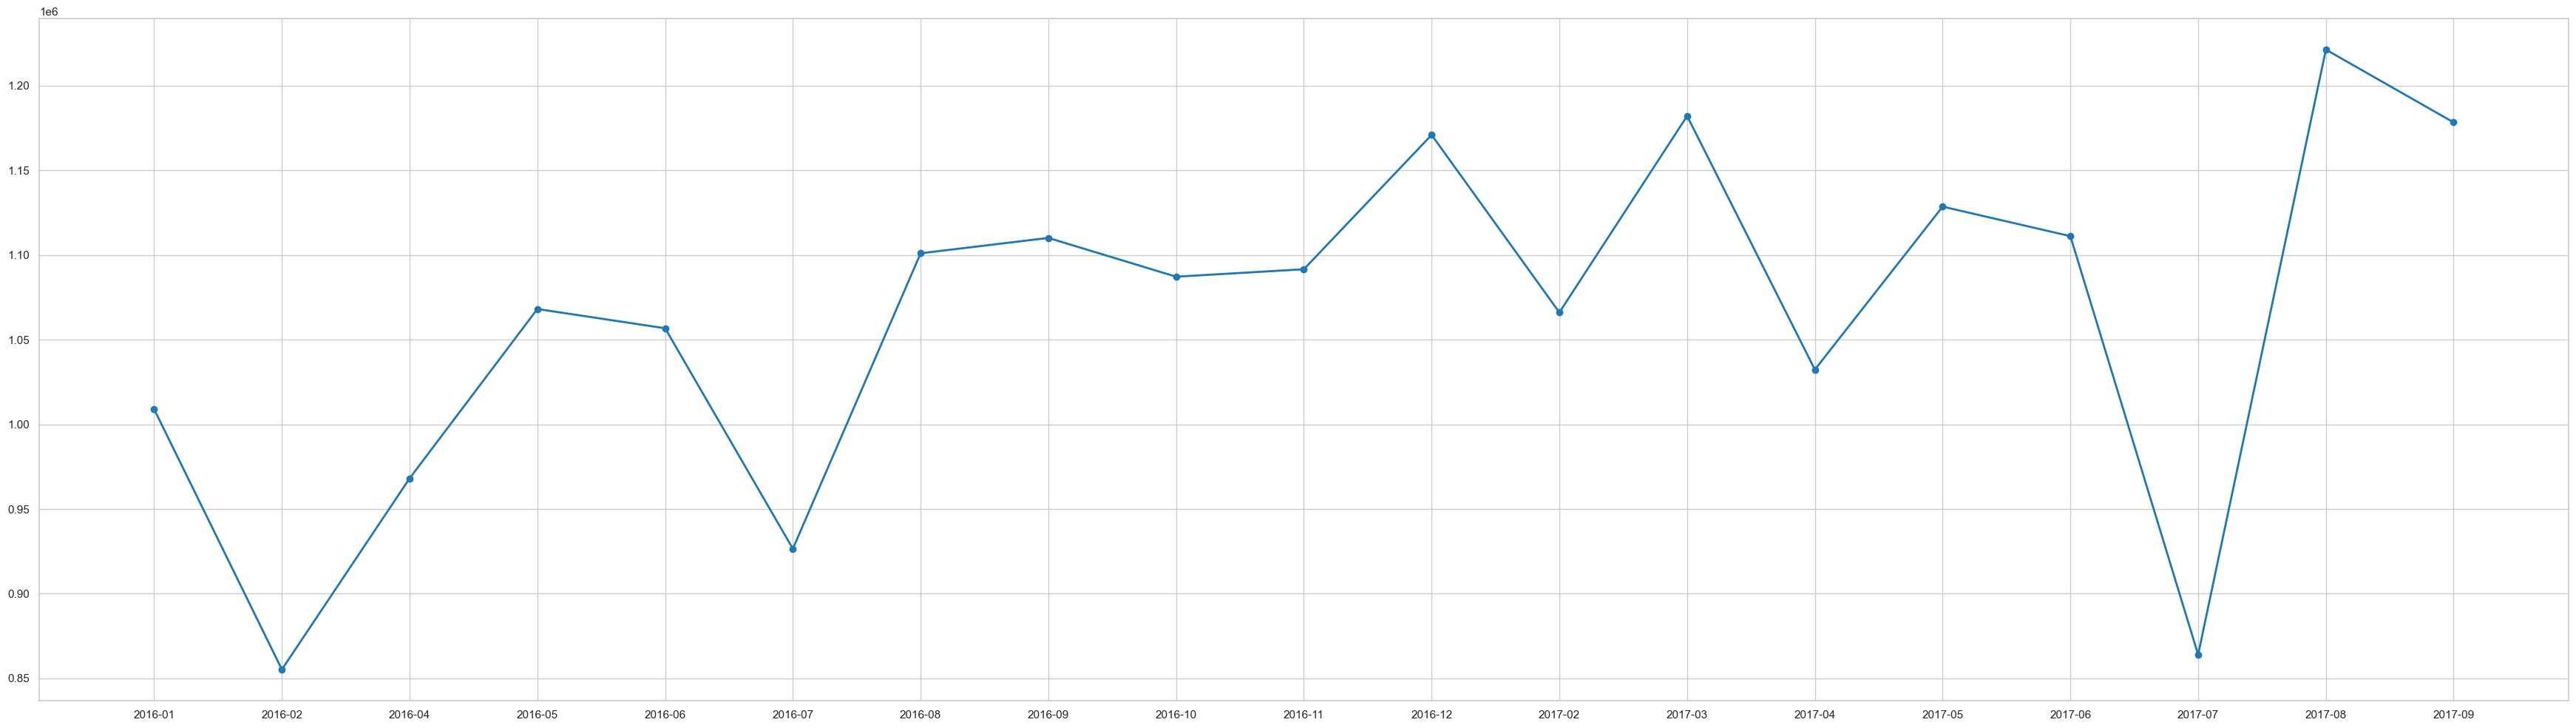

In [132]:
fig = plt.figure(figsize=(35,10))
df = train_set
values= df.groupby(df.YearMonth)["Price"].mean()
plt.plot(values,marker="o")


fig.tight_layout()

In [133]:
seed = 1
columns_train=["Rooms","Distance","Bedroom2","Bathroom","Car","Landsize","BuildingArea","YearBuilt","Lattitude","Longtitude","Propertycount"]
# columns_train=["NB"]
train_data = train_set[columns_train].fillna(0)

dt = [train_data.apply(lambda x: [x.Rooms,x.Distance,x.Bedroom2,x.Bathroom,x.Car,x.Landsize,x.BuildingArea,x.YearBuilt,x.Lattitude,x.Longtitude,x.Propertycount], axis=1)]
# dt = [train_data.apply(lambda x: [x.NB], axis=1)]
target = np.array(train_set.Price) #target
data_matrix = []
for data in dt[0]:
    data_array=np.array(data)
    data_matrix.append(data_array)

data_matrix= np.array(data_matrix)

In [134]:
X,y = data_matrix, target # Create X matrix and y vector from the dataset.
features = columns_train
print('feature names: {}'.format(columns_train))
print('Shape of data: {} {}'.format(X.shape, y.shape))

feature names: ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount']
Shape of data: (5432, 11) (5432,)


In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print('Train and test sizes of X: {} {}'.format(X_train.shape, X_test.shape))
print('Train and test sizes of y: {} {}'.format(y_train.shape, y_test.shape))

Train and test sizes of X: (4345, 11) (1087, 11)
Train and test sizes of y: (4345,) (1087,)


In [136]:
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression() # Create the Linear Regression estimator
lr.fit(X_train, y_train) # Perform the fitting


# Regrerssion coefs
coefs_lr = pd.Series(np.abs(lr.coef_), features).sort_values()

# Prediction
y_test_pred = lr.predict(X_test)

# evaluation
mse = mean_squared_error(y_test, y_test_pred)
r2score = lr.score(X_test, y_test)

# The coefficients
print('\nIntercept and coefs:\n{} {}'.format(lr.intercept_, lr.coef_))
# The mean squared error
print('\nMSE: {}'.format(mse))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: {}'.format(r2score))


Intercept and coefs:
-196623917.3156981 [ 3.00808187e+05 -4.47595987e+04  5.46877266e+03  1.76321166e+05
  5.97956773e+04  1.41970428e+01  3.56206841e+01 -3.82653435e+01
 -1.57645807e+06  9.47157722e+05 -1.68432183e+00]

MSE: 217103362155.2271
R^2 Score: 0.4710517662428456


<AxesSubplot:title={'center':'Model Coefficients'}>

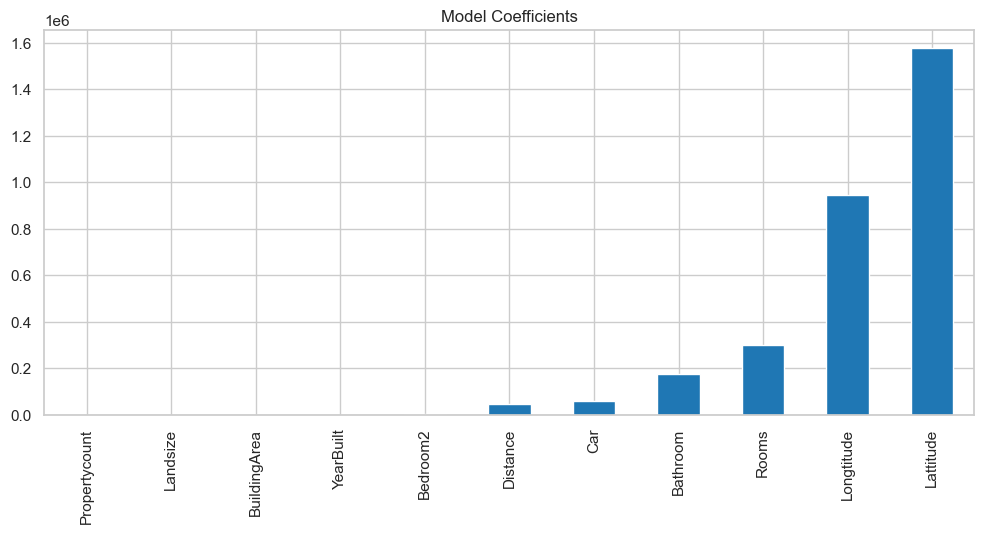

In [137]:
coefs_lr.plot(kind='bar', title='Model Coefficients')

# Anderson code end

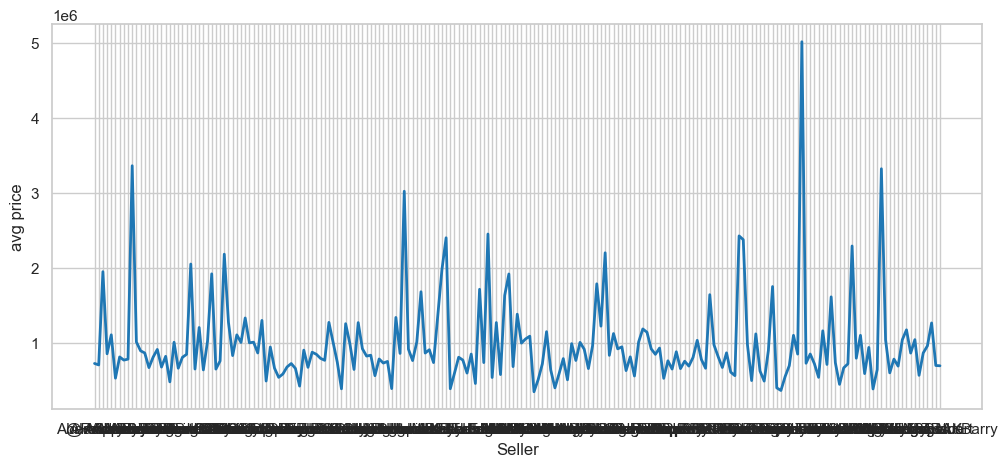

In [164]:
seller_mean_price = train_set.groupby('SellerG').mean().Price.reset_index()

seller_mean_price.columns = ['SellerG', 'SellerAvgPrice']

plt.ylabel('avg price')
plt.xlabel("Seller")
plt.plot(seller_mean_price['SellerG'], seller_mean_price['SellerAvgPrice'])



Text(0, 0.5, 'Avg Price')

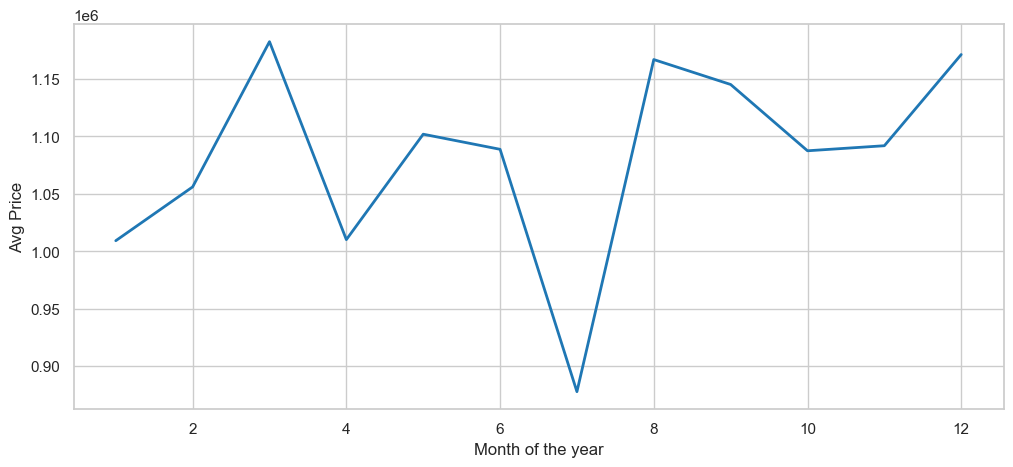

In [160]:
month_mean_price = train_set.groupby('Month').mean().Price.reset_index()

month_mean_price.columns = ['Month', 'MonthAvgPrice']

plt.plot(month_mean_price.Month, month_mean_price.MonthAvgPrice)

plt.xlabel("Month of the year")
plt.ylabel("Avg Price")

Text(0, 0.5, 'Avg Price')

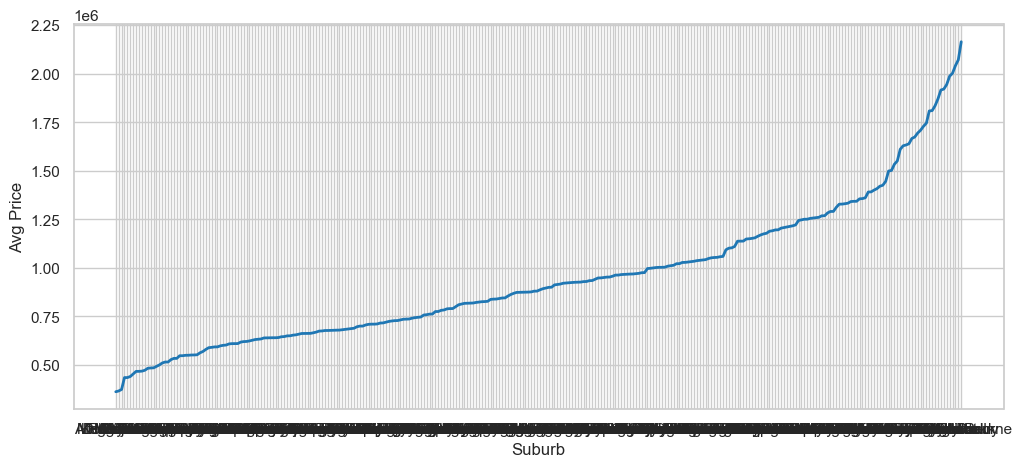

In [161]:
suburb_mean_price = train_set.groupby('Suburb').mean().Price.reset_index()

suburb_mean_price.columns = ['Suburb', 'SuburbAvgPrice']

suburb_mean_price = suburb_mean_price.sort_values(by = 'SuburbAvgPrice')

plt.plot(suburb_mean_price.Suburb, suburb_mean_price.SuburbAvgPrice)
plt.xlabel("Suburb")
plt.ylabel("Avg Price")



# Prediction part


In [142]:
train_set = pd.read_csv('data/train_set.csv',index_col=0) 
test_set = pd.read_csv('data/test_set.csv',index_col=0) 

In [144]:



train_set["Month"]=[datetime.datetime.strptime(d, format_str).date().month for d in train_set.Date] 

test_set["Month"]=[datetime.datetime.strptime(d, format_str).date().month for d in test_set.Date] 



In [146]:
def data_processing(df):

    
#drop columns which we won't be using

    df.drop('Address', axis=1, inplace=True)
    df.drop('Postcode', axis=1, inplace=True)
    
    
#these two ones are preliminary
    
    df.drop('BuildingArea', axis=1, inplace=True)
    df.drop('YearBuilt', axis=1, inplace=True)
    df.drop('Date', axis=1, inplace=True)

    
    
#Target encoding cathegorical variables using mean price 

    suburb_mean_price = train_set.groupby('Suburb').mean().Price.reset_index()
    suburb_mean_price.columns = ['Suburb', 'SuburbAvgPrice']

    df = pd.merge(df, suburb_mean_price, on = 'Suburb')
    df.drop('Suburb', axis=1, inplace=True)


    seller_mean_price = train_set.groupby('SellerG').mean().Price.reset_index()
    seller_mean_price.columns = ['SellerG', 'SellerAvgPrice']

    df = pd.merge(df, seller_mean_price, on = 'SellerG')
    df.drop('SellerG', axis=1, inplace=True)


    councilarea_mean_price = train_set.groupby('CouncilArea').mean().Price.reset_index()
    councilarea_mean_price.columns = ['CouncilArea', 'CouncilAreaAvgPrice']

    df = pd.merge(df, councilarea_mean_price, on = 'CouncilArea')
    df.drop('CouncilArea', axis=1, inplace=True)
    
    
    region_mean_price = train_set.groupby('Regionname').mean().Price.reset_index()
    region_mean_price.columns = ['Regionname', 'RegionMeanPrice']

    df = pd.merge(df, region_mean_price, on = 'Regionname')
    df.drop('Regionname', axis=1, inplace=True)


    month_mean_price = train_set.groupby('Month').mean().Price.reset_index()
    month_mean_price.columns = ['Month', 'MonthAvgPrice']

    df = pd.merge(df, month_mean_price, on = 'Month')
    df.drop('Month', axis=1, inplace=True)


#One hot encoding vor variables with very few possible values

    dummies = pd.get_dummies(df['Method'])

    df = pd.concat([df, dummies], axis=1).reindex(df.index)

    df.drop('Method', axis=1, inplace=True)


    dummies = pd.get_dummies(df['Type'])

    df = pd.concat([df, dummies], axis=1).reindex(df.index)

    df.drop('Type', axis=1, inplace=True)
    
    
    return df


 

    

In [147]:
processed_train_set = data_processing(train_set)
processed_test_set = data_processing(test_set)

processed_train_set = processed_train_set.fillna(0)
processed_test_set = processed_test_set.fillna(0)

# of neighbours =  2
----- EVALUATION ON TRAIN SET ------
RMSE 86439.90694639475
R^2:  0.9814144648827269


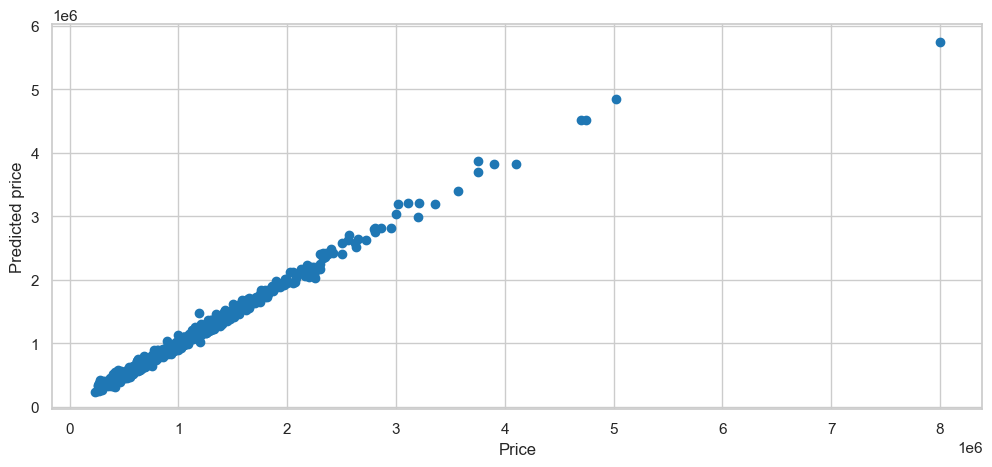

# of neighbours =  3
----- EVALUATION ON TRAIN SET ------
RMSE 86918.89438900845
R^2:  0.9812079190144439


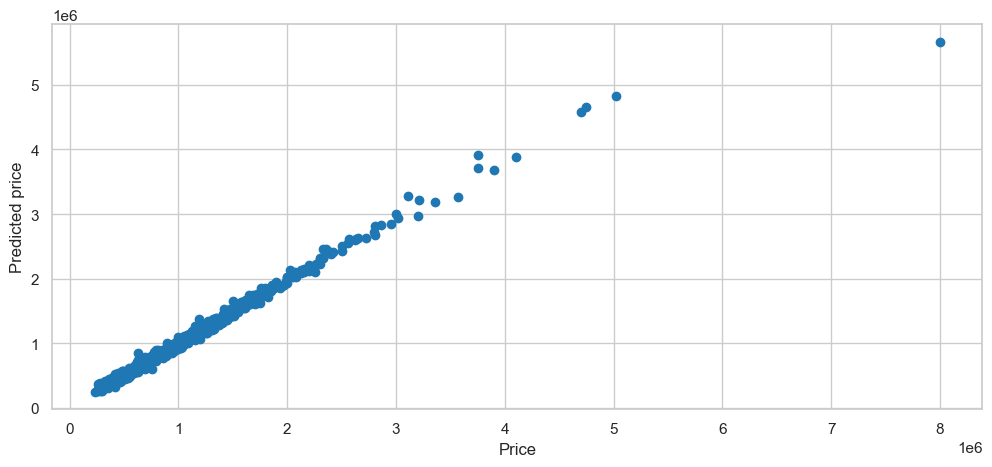

# of neighbours =  4
----- EVALUATION ON TRAIN SET ------
RMSE 86494.4612758286
R^2:  0.9813909979125146


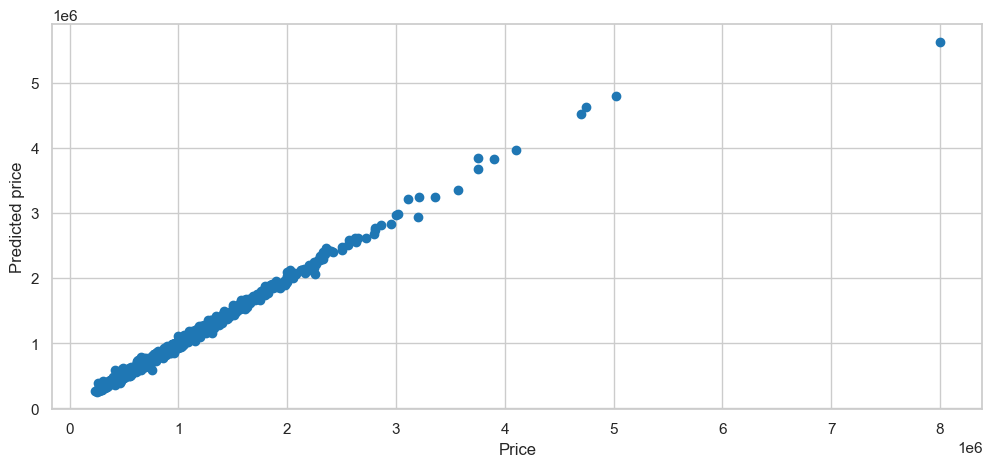

# of neighbours =  5
----- EVALUATION ON TRAIN SET ------
RMSE 91143.32653662271
R^2:  0.9793368637581843


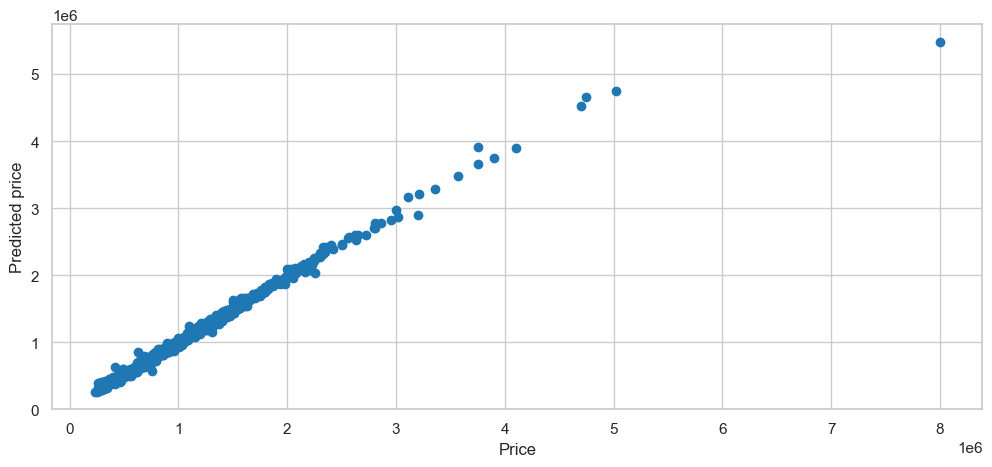

In [158]:
data_train, data_val, label_train, label_val = \
    train_test_split(processed_train_set, processed_train_set["Price"], test_size=0.2, random_state=6)

# KNeighborsRegressor
from sklearn import neighbors
for i in range(2,6):
    print("# of neighbours = ", i)
    n_neighbors = i # you can modify this paramenter (ONLY THIS ONE!!!) #Anderson
    model = neighbors.KNeighborsRegressor(n_neighbors)

    ## fit the model
    model.fit(data_train, label_train)

    ## predict training set
    y_pred = model.predict(data_val)

    ## Evaluate the model and plot it
    from sklearn.metrics import mean_squared_error, r2_score
    print("----- EVALUATION ON TRAIN SET ------")
    print("RMSE",np.sqrt(mean_squared_error(label_val, y_pred)))
    print("R^2: ",r2_score(label_val, y_pred))


    plt.scatter(label_val, y_pred)
    plt.xlabel('Price')
    plt.ylabel('Predicted price')
    plt.show()



In [157]:

X_train = processed_train_set.loc[:, processed_train_set.columns != 'Price']
y_train = processed_train_set[['Price']]


# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!) #Anderson
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X_train, y_train)

## predict training set
y_pred = model.predict(processed_test_set)



df_output = pd.DataFrame(y_pred).reset_index()

df_output.columns = ['index','Price']

df_output.to_csv('results.csv',index=False)

## EXERCICE - TRAIN A MODE, and upload your best solution to the Kaggle Challenge

Tasks: 
+ Clean and trasform the data
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


In [ ]:
## the features

## the model

## fit the model

## predict training set

## Evaluate the model and plot it

## predict the test set and generate the submission file

Explain the choosed model and why you think that is is the best:
